In [1]:
import data_utils
from mdp import MDP
from rewards import reward_func_linear,  reward_func_simple_decay  # Call it with stats to initialize
from env import Env
from q_learning import QLearningAlgo
from policy import EpsilonGreedyPolicy, GreedyPolicy, AlwaysDoPolicy, RandomPolicy

Using TensorFlow backend.


In [2]:
data = data_utils.Data(small=False)

100%|██████████| 53/53 [00:25<00:00,  1.61it/s]


In [22]:
mdp = MDP(data=data)
reward_func = reward_func_simple_decay(data.statistics, verbose=False, init_cost = .8)
env = Env(reward_func=reward_func, mode = 'machine')
# policy = EpsilonGreedyPolicy(action_space = mdp.action_space)
policy = RandomPolicy(action_space = mdp.action_space)
algo = QLearningAlgo(env = env, mdp= mdp, policy = policy, discount = 0.)

In [23]:
algo.fit(epochs = 1, remember=True)
algo.replay(batch_size=16, epochs = 2)

100%|██████████| 45816/45816 [01:52<00:00, 405.81it/s]


Training accumulated reward : -30588.48971215369
Epoch 0/2


100%|██████████| 45816/45816 [00:28<00:00, 1621.00it/s]


Epoch 1/2


100%|██████████| 45816/45816 [00:28<00:00, 1624.07it/s]


In [24]:
# test_policy = RandomPolicy(action_space = mdp.action_space)
test_policy = GreedyPolicy(action_space = mdp.action_space)
algo.test(policy = test_policy)

100%|██████████| 5329/5329 [00:01<00:00, 2884.23it/s]


Testing accumulated reward : 19.21827593469661


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def plot(algo, mode = None):
    if mode is None:
        modes = ['train','test', 'replay']
    else:
        modes = [mode]
        
    for mode in modes:
        fig, axes = plt.subplots(2, 2, figsize=(13, 10))
        fig.suptitle('Test with random policy')
        axes = axes.flatten()

        axes[0].set_title("Loss")
        axes[0].plot(algo.metrics[mode]['loss'].history)

        axes[1].set_title("Accumulated reward over time")
        axes[1].plot(algo.metrics[mode]['accumulated_reward'].history)

        axes[2].set_title("Reward over time")
        axes[2].scatter(range(len(algo.metrics[mode]['reward'].history)), algo.metrics[mode]['reward'].history, s = 0.3)

        q_vals = np.squeeze(algo.metrics[mode]['q_vals'].history)
        axes[3].set_title("Q_values of actions wrt. each other")
        axes[3].set_ylabel("action 1")
        axes[3].set_xlabel("action 0")
        axes[3].scatter(q_vals[:, 0], q_vals[:, 1], s = .1)
    q_vals = np.squeeze(algo.metrics['test']['q_vals'].history)
    print("Ratio of actions taken : %f"%(sum(np.argmax(q_vals, axis = 1)) / len(q_vals)))
    plt.show()

Ratio of actions taken : 0.005817


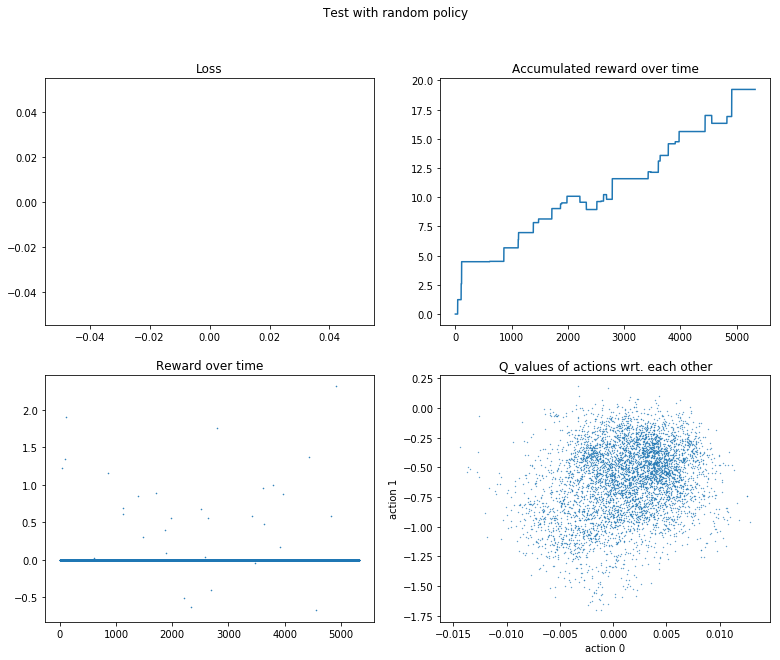

In [30]:
plot(algo, mode = 'test')